In [21]:
import json
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D
from tqdm import tqdm

def load_glove(words = None, glove_path = "../glove.6B/glove.6B.300d.txt", save_path = "../data/glove.json"):
    
    if "glove.json" in os.listdir("../data/"):
        with open(save_path, "r") as f:
            glove = json.load(f)
            f.close()
    else:
        glove = {}
        with open(glove_path, "r") as f:
            for line in tqdm(f):
                values = line.split()
                word = values[0]
                if words is None or word in words:
                    vector = np.asarray(values[1:], "float32")
                    glove[word] = vector.tolist()
            f.close()
        
        with open(save_path, "w") as f:
            json.dump(glove, f)
            f.close()
        
    return glove

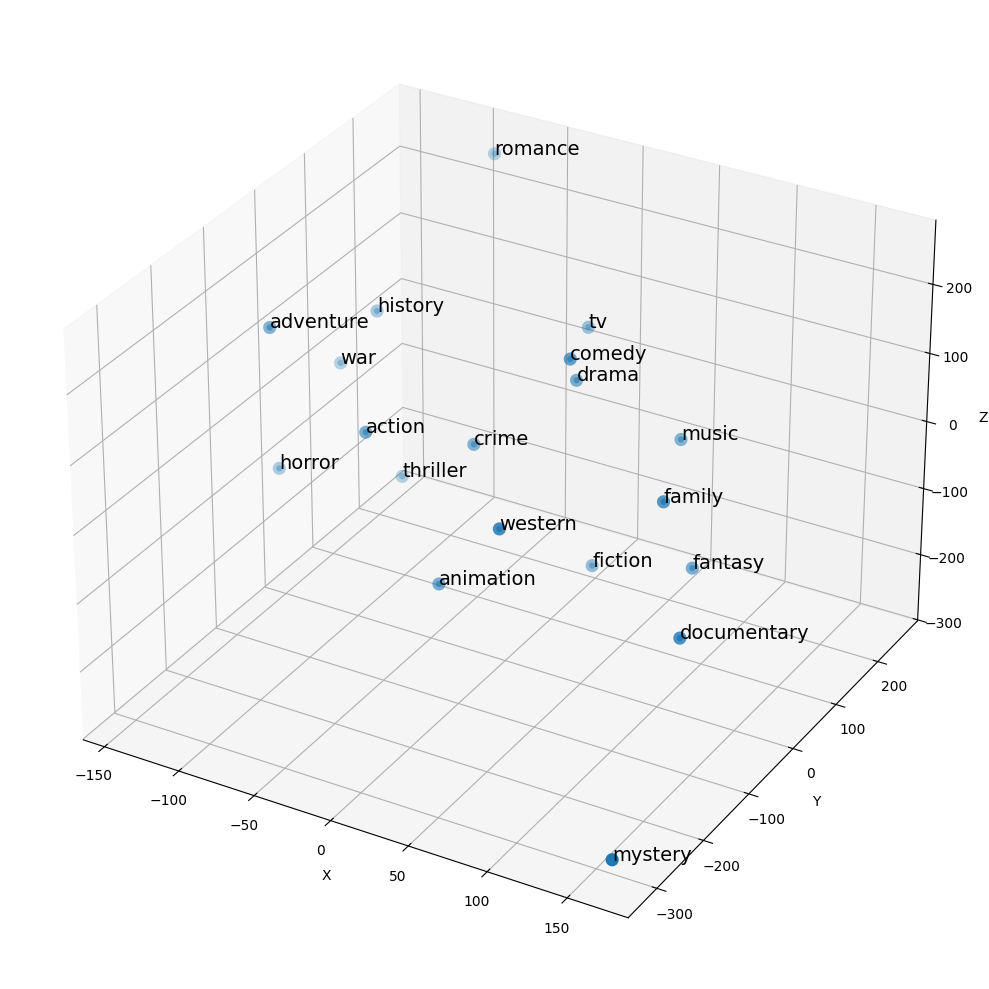

In [23]:
word_embeddings = load_glove()

# Extract words and their vectors
words = list(word_embeddings.keys())
vectors = np.array(list(word_embeddings.values()))

# Dimensionality reduction using t-SNE with adjusted perplexity
tsne = TSNE(n_components=3, perplexity=3)
vectors_3d = tsne.fit_transform(vectors)

# Plotting the 3D scatter plot
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with words
ax.scatter(vectors_3d[:, 0], vectors_3d[:, 1], vectors_3d[:, 2], linewidths=5)

# Annotate each point with its word
for i, word in enumerate(words):
    ax.text(vectors_3d[i, 0], vectors_3d[i, 1], vectors_3d[i, 2], word, fontsize=14)

# Set plot labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.tight_layout()
plt.show()